In [2]:
# Data extracted 6 October 2021
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Define Chromium as used browser
driver = webdriver.Chrome("/usr/lib/chromium-browser/chromedriver")

In [3]:
# Loop to loop through all pages
# Scrape first the number of pages (in progress)
url_list=[]
for p in range(1,45): #45
    url_01 = "https://asunnot.oikotie.fi/myytavat-asunnot?pagination="
    url_02 = str(p)
    url_03 = "&locations=%5B%22helsinki%22%5D&roomCount%5B%5D=2&cardType=100"        
    url_list.append(url_01 + url_02 + url_03)

In [11]:
# Define lists that will house the scraped results
addresses=[]
districts=[]
cities=[]
prices=[]
sizes=[]
years=[]
descriptions=[]

In [5]:
# Loop through each url and save information into lists
for i in url_list[0:44]:
    url = i
    driver.get(url)
    time.sleep(3)# This will make it work no matter how many pages are scraped at once
    content = driver.page_source
    soup = BeautifulSoup(content)
    while True:
        try:
            for a in soup.findAll('div',href=False, attrs={'class':'cards__card'}):
                address=a.find('div', attrs={'class':'ot-card__street'})
                district=a.find('span', attrs={'class':'ot-card__text'})
                city=a.find('span', attrs={'class':'ot-card__text ot-card__text--concat ng-binding ng-scope'})
                price=a.find('span', attrs={'class':'ot-card__price'})
                size=a.find('span', attrs={'class':'ot-card__size'})
                description=a.find('section', attrs={'class':'ot-card__section ng-scope'})
                print(address)
                addresses.append(address.text)
                districts.append(district.text)
                cities.append(city.text)
                prices.append(price.text)
                sizes.append(size.text)
                descriptions.append(description.text)
        except AttributeError:
            break


<div class="ot-card__street ng-binding" ng-bind="$ctrl.card.building.address">Torkkelinkatu 2 b A</div>
<div class="ot-card__street ng-binding" ng-bind="$ctrl.card.building.address">Vanhaistentie 5 E</div>
<div class="ot-card__street ng-binding" ng-bind="$ctrl.card.building.address">Kaupinmäenpolku 9</div>
<div class="ot-card__street ng-binding" ng-bind="$ctrl.card.building.address">Päivöläntie 24</div>
<div class="ot-card__street ng-binding" ng-bind="$ctrl.card.building.address">Ulvilantie 19 c</div>
<div class="ot-card__street ng-binding" ng-bind="$ctrl.card.building.address">Renginpolku 8</div>
<div class="ot-card__street ng-binding" ng-bind="$ctrl.card.building.address">Solnantie 26</div>
<div class="ot-card__street ng-binding" ng-bind="$ctrl.card.building.address">Kivikonkaari 5 A</div>
<div class="ot-card__street ng-binding" ng-bind="$ctrl.card.building.address">Lauttasaarentie 34 B 20</div>
<div class="ot-card__street ng-binding" ng-bind="$ctrl.card.building.address">Viipurinkat

KeyboardInterrupt: 

In [ ]:
# Write list contents to a csv file (for later use)
df = pd.DataFrame({'Address':addresses, 'District':districts, 'City':cities, 'Size':sizes, 'Price':prices, 'Description':descriptions})
df.to_csv('Apartments.csv', index=False, encoding='utf-8')

In [3]:
# Read prescraped csv (to not having to scrape all the time)
df = pd.read_csv('Apartments.csv')

In [5]:
# Check the data
df.head()

,Address,District,City,Size,Price,Description
0,Kotinummenkuja 2 D 13,Tapanila,Helsinki,58 m²,199 000 €,\n2h+k+kph+ter+piha\n
1,Thomas Byströmin kuja 2 C,Jätkäsaari,Helsinki,65 m²,555 000 €,\n2h+kt+s+2x las.parveke\n
2,Kolmas linja 5 A,Kallio,Helsinki,55 m²,304 000 €,\n2-3h+k+kph+vh\n
3,Raaseporintie 1 C,Puotinharju,Helsinki,46 m²,189 000 €,\n2h+k+kph+vh+parveke\n
4,Maurinkatu 14 D,Kruununhaka,Helsinki,"45,5 m²",340 000 €,\n2h + k+kph/wc+2 vh\n


In [10]:
# Remove whitespace from District column
df['District'] = df['District'].str.strip()

In [9]:
# Make Size column numeric with dot as a decimal point
split_01 = ' '
df['Size'] = df['Size'].str.split(split_01).str[0]
df['Size'] = df['Size'].str.replace(',', '.')
#print(df['Size'])

# Make Price column numeric
split_02 = '€'
df['Price'] = df['Price'].str.split(split_02).str[0]
df['Price'] = df['Price'].str.strip()
df['Price'] = df['Price'].str.replace('\xa0','')
#print(df['Price'])


In [11]:
# Change data types for Size and Price as float and integer
df = df.astype({'Size': float, 'Price': int})

In [12]:
# Calculate Sqm price and include in the data frame
df['SqmPrice'] = df['Price']/df['Size']

In [13]:
# Kallio district - subset inspection out of curiosity...
kallio_sub = df[df['District'] == 'Kallio']
kallio_sub = kallio_sub.sort_values('SqmPrice')
kallio_sub

,Address,District,City,Size,Price,Description,SqmPrice
507,Kolmas linja 5 A,Kallio,Helsinki,55.0,279000,"\n2h,avokeittiö,kph\n",5072.727273
2,Kolmas linja 5 A,Kallio,Helsinki,55.0,304000,\n2-3h+k+kph+vh\n,5527.272727
460,Kirstinkatu 9 B,Kallio,Helsinki,52.0,308000,\n2h+k+kph\n,5923.076923
585,Helsinginkatu 8,Kallio,Helsinki,58.0,345000,\n2h + avokeittiö + kph + alkovi\n,5948.275862
610,Alppikatu 13 B,Kallio,Helsinki,56.5,344000,\n2h+k\n,6088.495575
536,Suonionkatu 1 B,Kallio,Helsinki,44.0,275000,"\n2h, avok, kph/wc\n",6250.000000
26,Vaasankatu 18 B,Kallio,Helsinki,50.5,320000,"\n2h, k, kph, lasitettu parveke\n",6336.633663
568,Neljäs linja 16,Kallio,Helsinki,54.0,344000,\n2h+k+kph+vh+p\n,6370.370370
269,Itäinen Alppirinne 1A D,Kallio,Helsinki,52.5,335000,\n2h + avokeittiö (yhtiöjärjestyksen mukaan1h+...,6380.952381
685,Toinen linja 15 B,Kallio,Helsinki,40.5,270000,\n2h+kk\n,6666.666667


In [15]:
# Calculate average Sqm prices for Helsinki and Kallio - once again out of curiosity...
neliohinnat_hki = df['Price']/df['Size']
keskineliohinta_hki = np.mean(neliohinnat_hki)
print("Mean SqmPrice, Helsinki: ", np.round(keskineliohinta_hki,0))
neliohinnat_kallio = df.loc[df['District'] == 'Kallio', 'Price']/df.loc[df['District'] == 'Kallio', 'Size']
keskineliohinta_kallio = np.mean(neliohinnat_kallio)
print("Mean SqmPrice, Kallio: ", np.round(keskineliohinta_kallio,0))

Mean SqmPrice, Helsinki:  6325.0
Mean SqmPrice, Kallio:  7075.0


In [16]:
# Pivot table of mean sqm prices by district
SqmPrice_pivot = df.pivot_table(index = ['District'], values = ['SqmPrice'], aggfunc = np.mean)
SqmPrice_pivot = SqmPrice_pivot.rename(columns={'SqmPrice': 'SqmPrice_mean'})
SqmPrice_pivot = SqmPrice_pivot.reset_index()
SqmPrice_pivot

,District,SqmPrice_mean
0,Alppiharju,6284.825014
1,Alppikylä,3863.230769
2,Alppila,6985.103098
3,Arabianranta,7062.749860
4,Aurinkolahti,5977.440376
...,...,...
111,Viikinmäki,6208.080808
112,Viikinranta,6842.105263
113,Viikki,3043.207252
114,Vuosaari,5068.270698


In [20]:
# Sort the data by mean sqm price
sorted_data = df
sorted_data = sorted_data.merge(SqmPrice_pivot, left_on = 'District', right_on = 'District')
sorted_data = sorted_data.sort_values('SqmPrice_mean')
sorted_data

,Address,District,City,Size,Price,Description,SqmPrice,SqmPrice_mean
1005,Messipojankuja 12 B 45,Ruoholahti,Helsinki,48.0,14485,\n2H+KK+S\n,301.770833,301.770833
817,Paciuksenkaari 12 A 05,Huopalahti,Helsinki,46.5,16592,\n2H+KK+S\n,356.817204,368.205062
818,Paciuksenkaari 12 B 31,Huopalahti,Helsinki,56.5,21447,\n2H+K+S\n,379.592920,368.205062
994,Kirjokiventie 1 ja 2,Maununneva,Helsinki,51.0,19954,\n2H+K+S\n,391.254902,391.254902
907,Muinaisrannantie 3 D,Kivikko,Helsinki,53.0,215000,\n2h+kt+s\n,4056.603774,1453.792648
...,...,...,...,...,...,...,...,...
398,Merimiehenkatu 10,Punavuori,Helsinki,63.0,573000,"\n2h, k, kph\n",9095.238095,9954.082781
470,Uudenmaankatu 13 B,Punavuori / Kamppi,Helsinki,70.6,704000,\n2h + k + työtila + vh\n,9971.671388,9971.671388
971,Kalliolinnantie 10 B,Kaivopuisto,Helsinki,75.0,839000,"\n2 h, k, rt, kph, wc, vh, lasit. p\n",11186.666667,11186.666667
1012,Purjeentekijänkuja 11 A,Lauttasaari Vattuniemi,Helsinki,50.0,588000,"\n2 h, avok, kph, sauna, lasitettu terassiparv...",11760.000000,11760.000000


In [21]:
# Read in data for mapping districts to major districts
suurpiirit_data = pd.read_csv('Suurpiirit.csv')
suurpiirit_data

,Major_district,District
0,1,Vironniemi
1,1,Kruununhaka
2,1,Kluuvi
3,1,Katajanokka
4,1,Ullanlinna
...,...,...
177,8,Salmenkallio
178,8,Talosaari
179,8,Karhusaari
180,8,Landbo


In [22]:
# Merge major district information into the master data frame
sorted_data = sorted_data.merge(suurpiirit_data, on = 'District')
sorted_data

,Address,District,City,Size,Price,Description,SqmPrice,SqmPrice_mean,Major_district
0,Messipojankuja 12 B 45,Ruoholahti,Helsinki,48.0,14485,\n2H+KK+S\n,301.770833,301.770833,1
1,Kirjokiventie 1 ja 2,Maununneva,Helsinki,51.0,19954,\n2H+K+S\n,391.254902,391.254902,2
2,Muinaisrannantie 3 D,Kivikko,Helsinki,53.0,215000,\n2h+kt+s\n,4056.603774,1453.792648,7
3,Järkälekuja 1 D 66,Kivikko,Helsinki,44.0,14665,\n2H+KK+S\n,333.295455,1453.792648,7
4,Kivijatatie 4,Kivikko,Helsinki,61.0,208000,"\n2h, k, kph, s, piha\n",3409.836066,1453.792648,7
...,...,...,...,...,...,...,...,...,...
993,Iso Roobertinkatu 46 B,Punavuori,Helsinki,40.5,359000,"\n2h,avok,kph\n",8864.197531,9954.082781,1
994,Punavuorenkatu 21 C,Punavuori,Helsinki,60.0,445000,"\n2 h, keittiö, kph/wc, lasitettu parveke \n",7416.666667,9954.082781,1
995,Hietalahdenranta 2 A 22,Punavuori,Helsinki,62.5,688200,\n2H+KT+S+VIHERH.\n,11011.200000,9954.082781,1
996,Merimiehenkatu 10,Punavuori,Helsinki,63.0,573000,"\n2h, k, kph\n",9095.238095,9954.082781,1


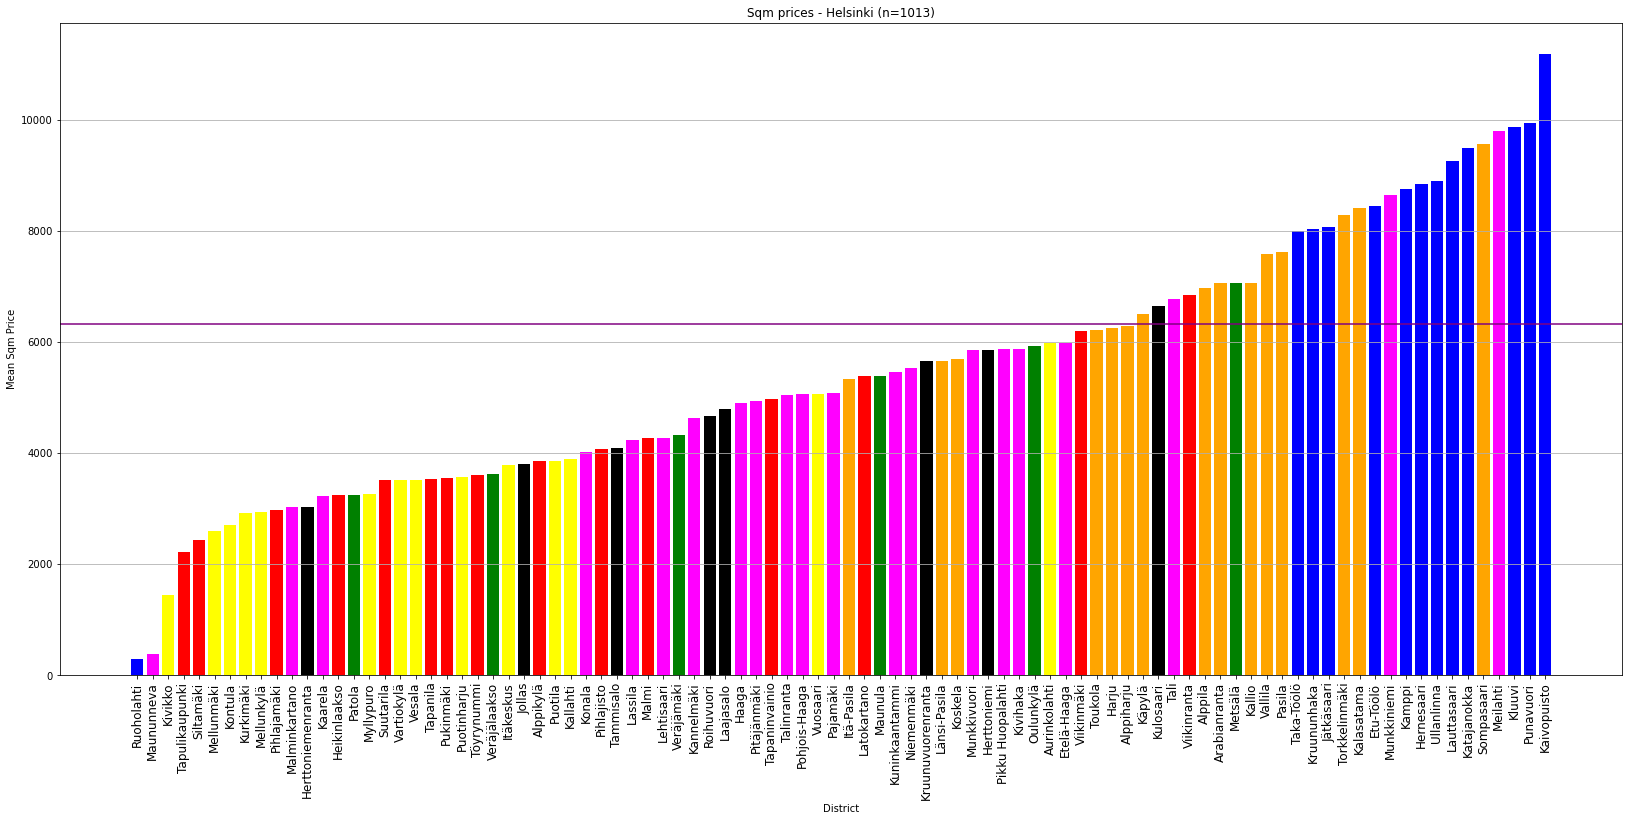

In [24]:
# Add colors for major districts
colors = {1:'blue', 2: 'magenta', 3: 'orange', 4: 'green', 5: 'red', 6: 'black', 7: 'yellow', 8: 'cyan'}

# Plot average sqm prices by district with colors for major districts
plt.bar('District', 'SqmPrice_mean', data = sorted_data, color=sorted_data['Major_district'].map(colors))
plt.axhline(keskineliohinta_hki, color='purple', label = 'Keskineliöhinta - Helsinki')
plt.xlabel('District')
plt.xticks(fontsize = 12, rotation = 90)
plt.ylabel('Mean Sqm Price')
plt.title('Sqm prices - Helsinki (n=1013)')
plt.grid(axis='y')
figure = plt.gcf()
figure.set_size_inches(28,12)
#plt.savefig('Plots/Jii.jpg', dpi = 100, bbox_inches = 'tight')

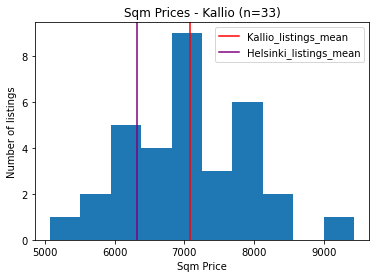

In [27]:
# Sqm price distribution of listings in Kallio district
plt.hist(neliohinnat_kallio, bins = 10)
plt.axvline(keskineliohinta_kallio, color='red', label = 'Kallio_listings_mean')
plt.axvline(keskineliohinta_hki, color='purple', label = 'Helsinki_listings_mean')
plt.xlabel('Sqm Price')
plt.ylabel('Number of listings')
plt.title('Sqm Prices - Kallio (n=33)')
plt.legend()
plt.show()
#keskineliohinta_kallio

In [29]:
# Apartment listing count per district
n_pivot = df.pivot_table(index = 'District', values = 'Address', aggfunc = 'count')
n_pivot = n_pivot.reset_index()
n_pivot = n_pivot.sort_values('Address', ascending=False)
n_pivot = n_pivot.rename(columns={'Address': 'Count'})
n_pivot

,District,Count
46,Lauttasaari,60
114,Vuosaari,52
54,Meilahti,49
66,Pasila,44
28,Kannelmäki,40
...,...,...
72,Pitäjänmäki / Reimarla / Konala,1
83,Ruoholahti,1
77,Punavuori / Kamppi,1
81,Rastilankallio,1


''

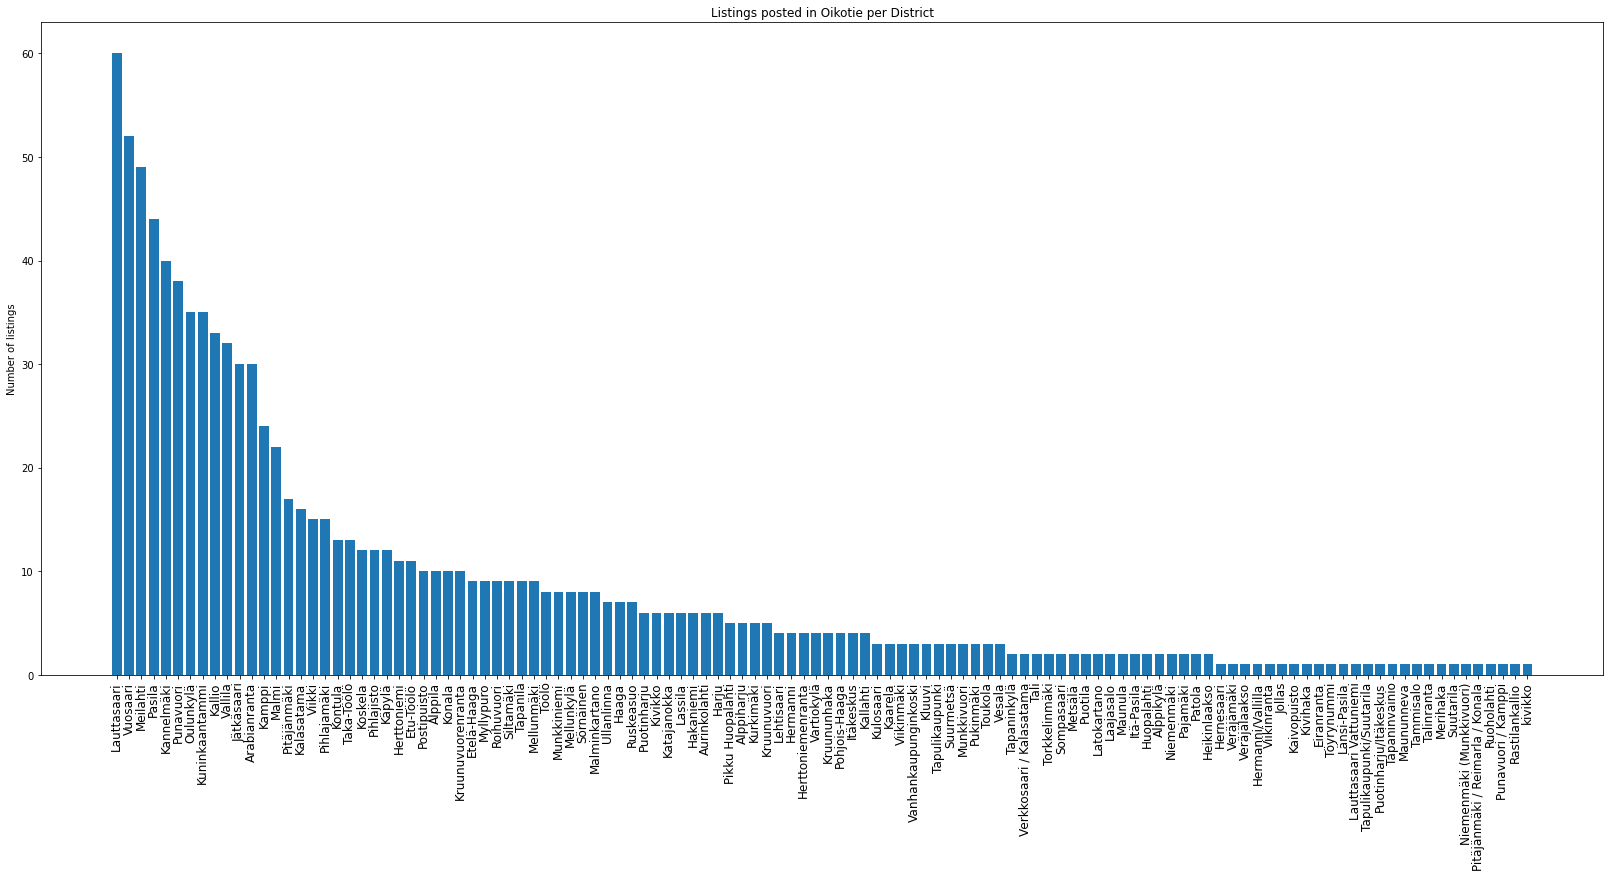

In [31]:
plt.bar('District', 'Count' , data = n_pivot)
plt.xticks(fontsize = 12, rotation = 90)
plt.ylabel('Number of listings')
plt.title('Listings posted in Oikotie per District')
figure = plt.gcf()
figure.set_size_inches(28,12)
#plt.savefig('Jee_04.jpg', dpi = 100, bbox_inches = 'tight')
;

In [ ]:
# Hintapyyntijakauma - Helsinki
# Järjestä vierekkäin 1X2-matriisiin
plt.hist()

plt.boxplot()

In [32]:
# Read in the sqm data on realized sales (Q2/2021)
sqm_data = pd.read_csv('Sqm_prices.csv')
sqm_data = sqm_data.rename(columns = {'SqmPrice': 'SqmPrice_real'})
sqm_data

,District,SqmPrice_real
0,Kaartinkaupunki,9986
1,Kaivopuisto,9633
2,Eira,9197
3,Punavuori,8856
4,Ruoholahti,8449
...,...,...
73,Puistola,2800
74,Siltamäki,2658
75,Kontula,2601
76,Mellunkylä,2512


In [33]:
# Merge realized sale prices with the main data frame
sorted_data_02 = sorted_data.merge(sqm_data, on = 'District')
sorted_data_02

,Address,District,City,Size,Price,Description,SqmPrice,SqmPrice_mean,Major_district,SqmPrice_real
0,Messipojankuja 12 B 45,Ruoholahti,Helsinki,48.0,14485,\n2H+KK+S\n,301.770833,301.770833,1,8449
1,Kirjokiventie 1 ja 2,Maununneva,Helsinki,51.0,19954,\n2H+K+S\n,391.254902,391.254902,2,3994
2,Kaksostentie 6,Siltamäki,Helsinki,63.5,119867,"\n2h, k, kph, vh, p\n",1887.669291,2433.004496,5,2658
3,Jousimiehentie 10 C,Siltamäki,Helsinki,48.5,132023,\n2h+kk+kph\n,2722.123711,2433.004496,5,2658
4,Kiertotähdentie 6 C,Siltamäki,Helsinki,50.0,119000,\n2h+kk+kph\n,2380.000000,2433.004496,5,2658
...,...,...,...,...,...,...,...,...,...,...
534,Iso Roobertinkatu 46 B,Punavuori,Helsinki,40.5,359000,"\n2h,avok,kph\n",8864.197531,9954.082781,1,8856
535,Punavuorenkatu 21 C,Punavuori,Helsinki,60.0,445000,"\n2 h, keittiö, kph/wc, lasitettu parveke \n",7416.666667,9954.082781,1,8856
536,Hietalahdenranta 2 A 22,Punavuori,Helsinki,62.5,688200,\n2H+KT+S+VIHERH.\n,11011.200000,9954.082781,1,8856
537,Merimiehenkatu 10,Punavuori,Helsinki,63.0,573000,"\n2h, k, kph\n",9095.238095,9954.082781,1,8856


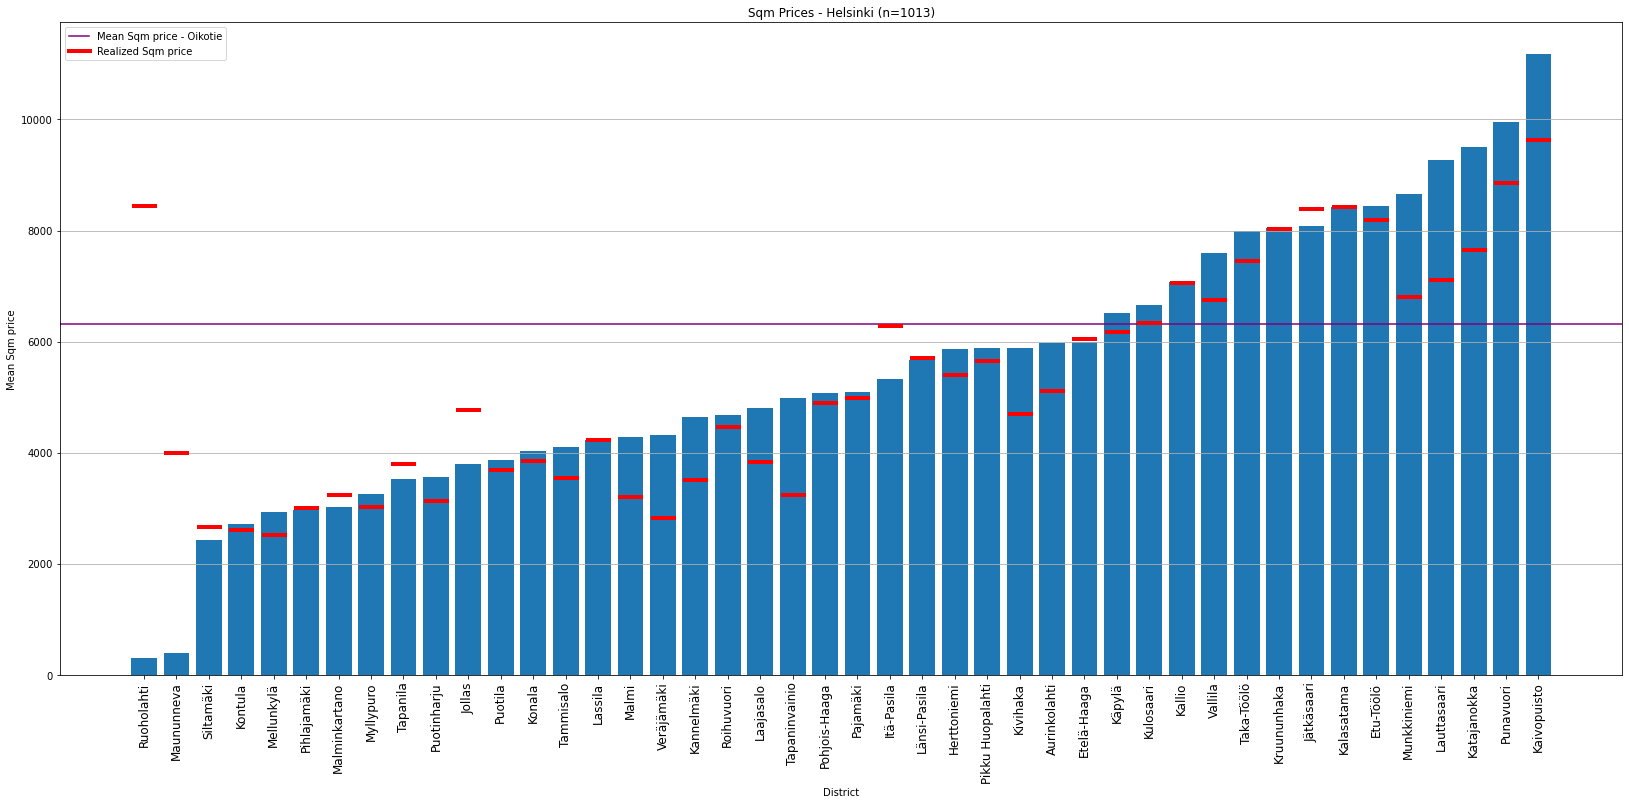

In [34]:
# Plot mean sqm prices for Oikotie listings with realized sqm prices and average sqm price of listings  
plt.bar('District', 'SqmPrice_mean', data = sorted_data_02)
plt.axhline(keskineliohinta_hki, color='purple', label = 'Mean Sqm price - Oikotie')
#plt.axhline(y=sorted_data_02['SqmPrice_real'], color='b', linestyle=':', label='red line')
plt.plot(pd.unique(sorted_data_02['SqmPrice_real']), '_' , color = 'red', mew = 4, ms = '25', label = 'Realized Sqm price')
plt.xlabel('District')
plt.xticks(fontsize = 12, rotation = 90)
plt.ylabel('Mean Sqm price')
plt.title('Sqm Prices - Helsinki (n=1013)')
plt.legend()
plt.grid(axis='y')
figure = plt.gcf()
figure.set_size_inches(28,12)
#plt.savefig('Jee_02.jpg', dpi = 100, bbox_inches = 'tight')

In [36]:
# Inspect Kallio district one more time...
sorted_kallio = sorted_data_02[sorted_data_02['District'] == 'Kallio']
sorted_kallio = sorted_kallio.sort_values('SqmPrice')
sorted_kallio.loc[sorted_kallio['Address'] == 'Viides linja 2 B', 'Address'] = ['Viides linja 2 B 1', 'Viides linja 2 B 2']
sorted_kallio

,Address,District,City,Size,Price,Description,SqmPrice,SqmPrice_mean,Major_district,SqmPrice_real
251,Kolmas linja 5 A,Kallio,Helsinki,55.0,279000,"\n2h,avokeittiö,kph\n",5072.727273,7074.598228,3,7051
266,Kolmas linja 5 A,Kallio,Helsinki,55.0,304000,\n2-3h+k+kph+vh\n,5527.272727,7074.598228,3,7051
259,Kirstinkatu 9 B,Kallio,Helsinki,52.0,308000,\n2h+k+kph\n,5923.076923,7074.598228,3,7051
248,Helsinginkatu 8,Kallio,Helsinki,58.0,345000,\n2h + avokeittiö + kph + alkovi\n,5948.275862,7074.598228,3,7051
243,Alppikatu 13 B,Kallio,Helsinki,56.5,344000,\n2h+k\n,6088.495575,7074.598228,3,7051
250,Suonionkatu 1 B,Kallio,Helsinki,44.0,275000,"\n2h, avok, kph/wc\n",6250.000000,7074.598228,3,7051
268,Vaasankatu 18 B,Kallio,Helsinki,50.5,320000,"\n2h, k, kph, lasitettu parveke\n",6336.633663,7074.598228,3,7051
249,Neljäs linja 16,Kallio,Helsinki,54.0,344000,\n2h+k+kph+vh+p\n,6370.370370,7074.598228,3,7051
257,Itäinen Alppirinne 1A D,Kallio,Helsinki,52.5,335000,\n2h + avokeittiö (yhtiöjärjestyksen mukaan1h+...,6380.952381,7074.598228,3,7051
242,Toinen linja 15 B,Kallio,Helsinki,40.5,270000,\n2h+kk\n,6666.666667,7074.598228,3,7051


''

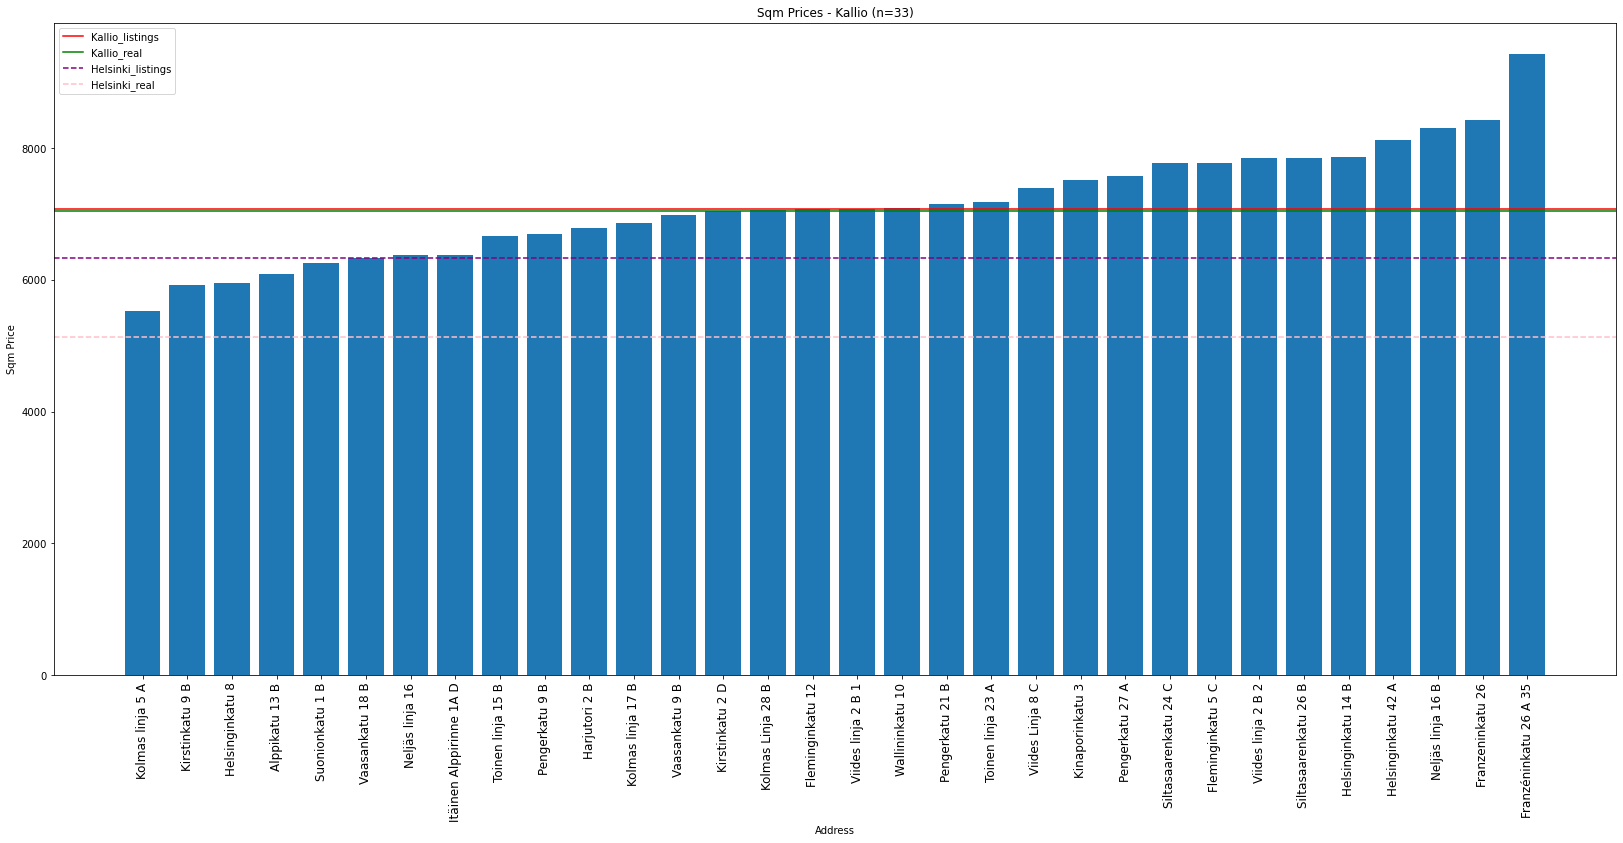

In [39]:
# Plot listing prices in Kallio with sqm means for Helsinki and Kallio (Oikotie means and realized means) 
kallio_sqm_real = sorted_kallio['SqmPrice_real']
hki_sqm_real = np.mean(sqm_data['SqmPrice_real'])

plt.bar('Address','SqmPrice', data = sorted_kallio)
plt.xticks(fontsize = 12, rotation = 90)
plt.axhline(keskineliohinta_kallio, color='red', label = 'Kallio_listings')
plt.axhline(kallio_sqm_real.iloc[0], color='green', label = 'Kallio_real')
plt.axhline(keskineliohinta_hki, color='purple', label = 'Helsinki_listings', linestyle = 'dashed')
plt.axhline(hki_sqm_real, color='pink', label = 'Helsinki_real', linestyle = 'dashed')

plt.ylabel('Sqm Price')
plt.xlabel('Address')
plt.title('Sqm Prices - Kallio (n=33)')
plt.legend()
figure = plt.gcf()
figure.set_size_inches(28,12)
#plt.savefig('Jee_03.jpg', dpi = 100, bbox_inches = 'tight')
;